In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from garuda.ops import geo_to_webm_pixel, webm_pixel_to_geo, local_to_geo, label_studio_csv_to_obb
from garuda.od import yolo_aa_to_geo, yolo_obb_to_geo, add_obb_to_label_studio_df
from garuda.plot import plot_webm_pixel_to_geo

Specify the config

In [4]:
img_center_lon = 87.93
img_center_lat = 22.32
zoom = 17
image_path = f"../data/images/{img_center_lat},{img_center_lon}.png"
aa_label_path = f"../data/labels/aa/{img_center_lat},{img_center_lon}_aa.txt"
obb_label_path = f"../data/labels/obb/{img_center_lat},{img_center_lon}_obb.txt"
raw_csv_path = f"../data/raw/{img_center_lat},{img_center_lon}_raw.csv"

### Get the geo-locations of the objects from yolo predictions

In [5]:
img = plt.imread(image_path)
img_width = img.shape[0]
img_height = img.shape[1]
aa_yolo_lables = np.loadtxt(aa_label_path, ndmin=2)
bbox_geo = yolo_aa_to_geo(aa_yolo_lables, zoom, img_center_lat, img_center_lon, img.shape[0], img_height=img.shape[1])
print(bbox_geo)

[[ 1.         22.32520659 87.93496674]
 [ 1.         22.32360895 87.93237122]
 [ 1.         22.322238   87.93288391]
 [ 1.         22.32071142 87.92991989]
 [ 1.         22.32133391 87.93233917]
 [ 1.         22.31762116 87.93244331]
 [ 1.         22.31710981 87.93048866]
 [ 1.         22.3167615  87.93194664]
 [ 1.         22.31516075 87.92982376]]


We can also provide path to the label instead of label itself.

In [6]:
bbox_geo = yolo_aa_to_geo(aa_label_path, zoom, img_center_lat, img_center_lon, img_width, img_height)
print(bbox_geo)

[[ 1.         22.32520659 87.93496674]
 [ 1.         22.32360895 87.93237122]
 [ 1.         22.322238   87.93288391]
 [ 1.         22.32071142 87.92991989]
 [ 1.         22.32133391 87.93233917]
 [ 1.         22.31762116 87.93244331]
 [ 1.         22.31710981 87.93048866]
 [ 1.         22.3167615  87.93194664]
 [ 1.         22.31516075 87.92982376]]


In [7]:
obb_yolo_lables = np.loadtxt(obb_label_path, ndmin=2)
bbox_geo = yolo_obb_to_geo(obb_yolo_lables, zoom, img_center_lat, img_center_lon, img.shape[0], img.shape[1])
print(bbox_geo)

[[ 1.         22.32520659 87.93496674]
 [ 1.         22.32360895 87.93237122]
 [ 1.         22.322238   87.93288391]
 [ 1.         22.32071142 87.92991989]
 [ 1.         22.32133391 87.93233917]
 [ 1.         22.31762116 87.93244331]
 [ 1.         22.31710981 87.93048866]
 [ 1.         22.3167615  87.93194664]
 [ 1.         22.31516075 87.92982376]]


In [8]:
bbox_geo = yolo_obb_to_geo(obb_label_path, zoom, img_center_lat, img_center_lon, img.shape[0], img_height=img.shape[1])
print(bbox_geo)

[[ 1.         22.32520659 87.93496674]
 [ 1.         22.32360895 87.93237122]
 [ 1.         22.322238   87.93288391]
 [ 1.         22.32071142 87.92991989]
 [ 1.         22.32133391 87.93233917]
 [ 1.         22.31762116 87.93244331]
 [ 1.         22.31710981 87.93048866]
 [ 1.         22.3167615  87.93194664]
 [ 1.         22.31516075 87.92982376]]


### Plot the geo-locations on the map

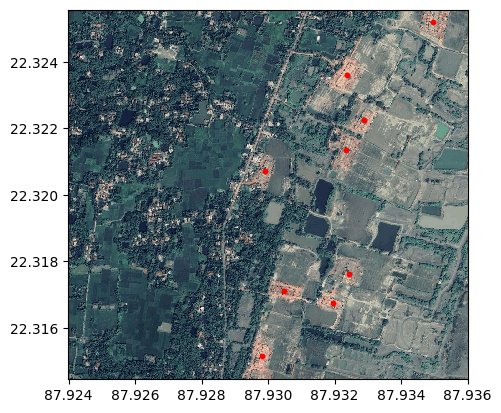

In [9]:
fig, ax = plt.subplots()
plot_webm_pixel_to_geo(img, img_center_lat, img_center_lon, zoom, ax)

lons = bbox_geo[:, 2]
lats = bbox_geo[:, 1]

plt.scatter(lons, lats, c='r', s=10)

### Convert from label studio csv to yolo format

In [10]:
df = pd.read_csv(raw_csv_path)
label_map = {"FCBK": 0, "Zigzag": 1, "ZIGZAG": 1}
df = add_obb_to_label_studio_df(df, label_map)
df['obb']

0    [[1.0, 0.9308373167856355, 0.06320884291550667...
Name: obb, dtype: object

In [11]:
obb_label = df.iloc[0]['obb']
print(obb_label.shape)

(9, 9)


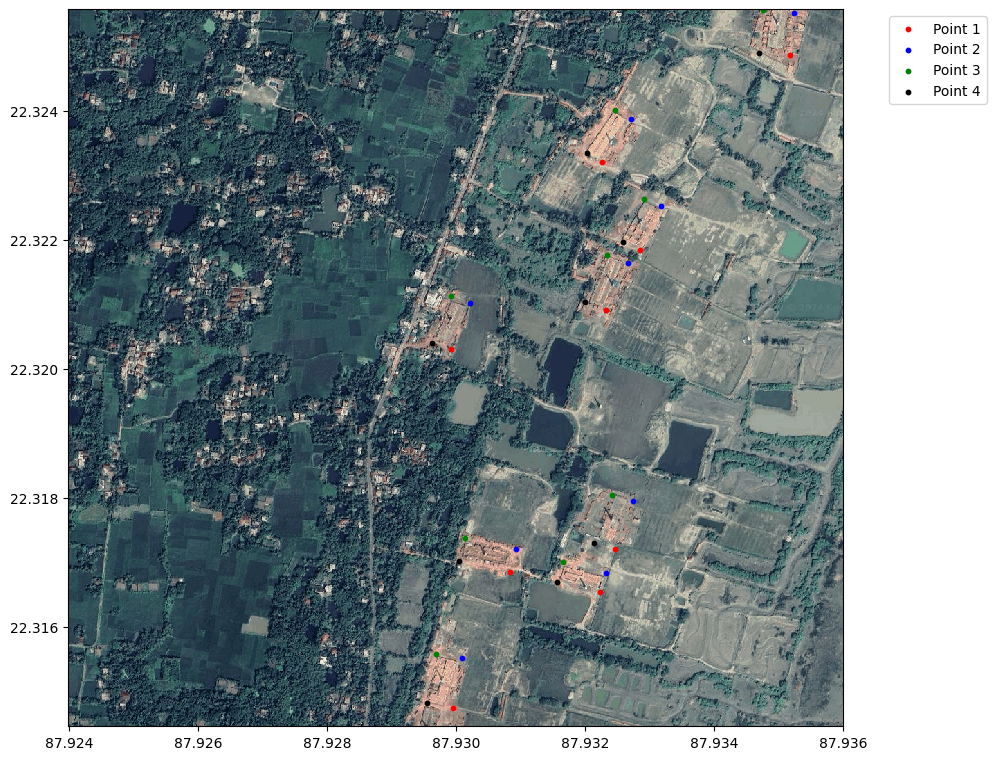

In [12]:
lat_lon1 = local_to_geo(obb_label[:, 1], obb_label[:, 2], zoom, img_center_lat, img_center_lon, img_width, img_height)
lat_lon2 = local_to_geo(obb_label[:, 3], obb_label[:, 4], zoom, img_center_lat, img_center_lon, img_width, img_height)
lat_lon3 = local_to_geo(obb_label[:, 5], obb_label[:, 6], zoom, img_center_lat, img_center_lon, img_width, img_height)
lat_lon4 = local_to_geo(obb_label[:, 7], obb_label[:, 8], zoom, img_center_lat, img_center_lon, img_width, img_height)

fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
plot_webm_pixel_to_geo(img, img_center_lat, img_center_lon, zoom, ax)

plt.scatter(lat_lon1[:, 1], lat_lon1[:, 0], c='r', s=10, label='Point 1')
plt.scatter(lat_lon2[:, 1], lat_lon2[:, 0], c='b', s=10, label='Point 2')
plt.scatter(lat_lon3[:, 1], lat_lon3[:, 0], c='g', s=10, label='Point 3')
plt.scatter(lat_lon4[:, 1], lat_lon4[:, 0], c='k', s=10, label='Point 4')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')